# Semantic Segmentation v2
Implement FCN-32s architecture for semantic segmentation.

[Paper](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)

Download and load data:

In [ ]:
!wget https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz

--2021-01-13 19:46:11--  https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz
Resolving www.mimuw.edu.pl (www.mimuw.edu.pl)... 193.0.96.14
Connecting to www.mimuw.edu.pl (www.mimuw.edu.pl)|193.0.96.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307552213 (293M)
Saving to: ‘segmentation.npz’

segmentation.npz    100%[===================>] 293.30M  3.92MB/s    in 69s     

2021-01-13 19:47:21 (4.24 MB/s) - ‘segmentation.npz’ saved [307552213/307552213]



In [ ]:
# Data is already preprocessed.
import numpy as np
data = np.load('segmentation.npz')
train_x, train_y, test_x, test_y = data['train_x'], data['train_y'], data['test_x'], data['test_y']
del data

In [ ]:
#Constants
batch_size = 3
total_epochs = 100
lr_base = 0.01
lr_power = 0.5

In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Conv2DTranspose, Cropping2D
from tensorflow.keras.optimizers import SGD

nb_classes = 12

inputs = Input(shape=(360, 480, 3))
x = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
# for l in x.layers:
#   l.trainable = False

x = x.layers[-1].output

x = Conv2D(4096, 7, padding='same', activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(4096, 1, padding='same', activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(nb_classes, 1, padding='same', activation='relu')(x)

x = Conv2DTranspose(filters=nb_classes, kernel_size=(64, 64), strides=(33, 32), padding='same', activation='softmax')(x)
x = Cropping2D(((0, 3), 0))(x)

model = Model(inputs=inputs, outputs=x)
optimizer = SGD(learning_rate=lr_base, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Custom Callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
class PrintingCallback(Callback):
   
    def on_epoch_end(self, epoch, logs=None):
      if epoch % 10 == 1:
        pred = model.predict(np.expand_dims(test_x[0], axis=0))[0].argmax(axis=2)
        plt.imshow(pred)
        plt.show()
        pred = model.predict(np.expand_dims(train_x[0], axis=0))[0].argmax(axis=2)
        plt.imshow(pred)
        plt.show()

def LRScheduler(epoch):
  return lr_base * ((1 - float(epoch) / total_epochs) ** lr_power)

lrsched = LearningRateScheduler(LRScheduler)

Epoch 1/100
123/123 [==============================] - 44s 293ms/step - loss: 2.0854 - accuracy: 0.3080 - val_loss: 1.0231 - val_accuracy: 0.6189
Epoch 2/100
123/123 [==============================] - 34s 276ms/step - loss: 0.8793 - accuracy: 0.7201 - val_loss: 0.7102 - val_accuracy: 0.8142


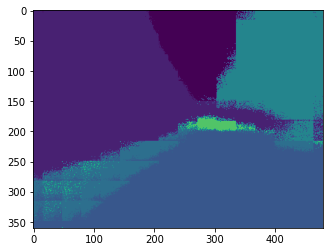

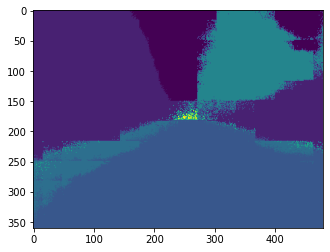

Epoch 3/100
123/123 [==============================] - 34s 276ms/step - loss: 0.5752 - accuracy: 0.8263 - val_loss: 0.5483 - val_accuracy: 0.8415
Epoch 4/100
123/123 [==============================] - 34s 276ms/step - loss: 0.4837 - accuracy: 0.8495 - val_loss: 0.4799 - val_accuracy: 0.8506
Epoch 5/100
123/123 [==============================] - 34s 276ms/step - loss: 0.4355 - accuracy: 0.8639 - val_loss: 0.4315 - val_accuracy: 0.8694
Epoch 6/100
123/123 [==============================] - 34s 276ms/step - loss: 0.3887 - accuracy: 0.8768 - val_loss: 0.4032 - val_accuracy: 0.8741
Epoch 7/100
123/123 [==============================] - 34s 276ms/step - loss: 0.3486 - accuracy: 0.8892 - val_loss: 0.4055 - val_accuracy: 0.8754
Epoch 8/100
123/123 [==============================] - 34s 277ms/step - loss: 0.3351 - accuracy: 0.8922 - val_loss: 0.3877 - val_accuracy: 0.8760
Epoch 9/100
123/123 [==============================] - 34s 276ms/step - loss: 0.3134 - accuracy: 0.8986 - val_loss: 0.3891 -

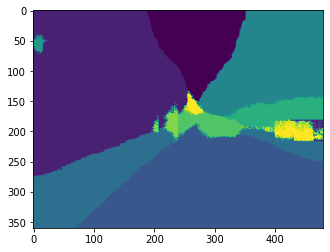

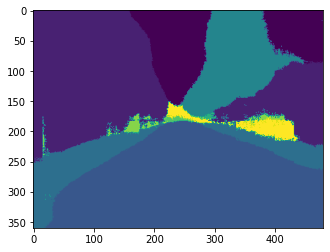

Epoch 13/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2798 - accuracy: 0.9070 - val_loss: 0.3724 - val_accuracy: 0.8818
Epoch 14/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2661 - accuracy: 0.9115 - val_loss: 0.3529 - val_accuracy: 0.8860
Epoch 15/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2573 - accuracy: 0.9136 - val_loss: 0.3561 - val_accuracy: 0.8862
Epoch 16/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2459 - accuracy: 0.9172 - val_loss: 0.3513 - val_accuracy: 0.8882
Epoch 17/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2507 - accuracy: 0.9144 - val_loss: 0.3698 - val_accuracy: 0.8835
Epoch 18/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2484 - accuracy: 0.9145 - val_loss: 0.3562 - val_accuracy: 0.8865
Epoch 19/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2283 - accuracy: 0.9215 - val_loss: 0

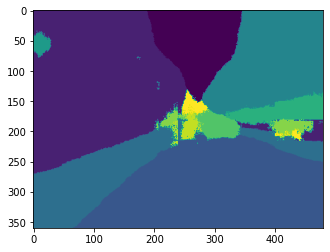

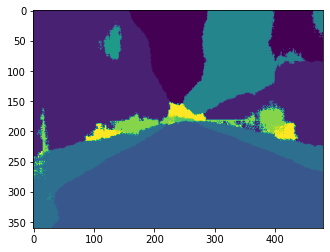

Epoch 23/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2167 - accuracy: 0.9240 - val_loss: 0.3557 - val_accuracy: 0.8911
Epoch 24/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2162 - accuracy: 0.9239 - val_loss: 0.3536 - val_accuracy: 0.8905
Epoch 25/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2129 - accuracy: 0.9249 - val_loss: 0.3754 - val_accuracy: 0.8904
Epoch 26/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2160 - accuracy: 0.9238 - val_loss: 0.3497 - val_accuracy: 0.8922
Epoch 27/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2097 - accuracy: 0.9256 - val_loss: 0.3479 - val_accuracy: 0.8943
Epoch 28/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2116 - accuracy: 0.9247 - val_loss: 0.3489 - val_accuracy: 0.8964
Epoch 29/100
123/123 [==============================] - 34s 276ms/step - loss: 0.2082 - accuracy: 0.9257 - val_loss: 0

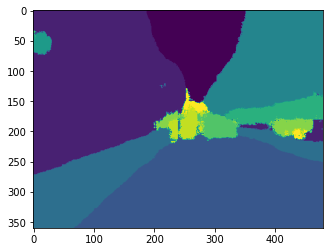

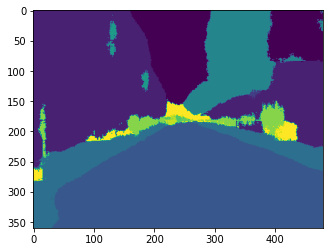

Epoch 33/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1950 - accuracy: 0.9294 - val_loss: 0.3639 - val_accuracy: 0.8965
Epoch 34/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1928 - accuracy: 0.9305 - val_loss: 0.3616 - val_accuracy: 0.8957
Epoch 35/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1939 - accuracy: 0.9298 - val_loss: 0.3484 - val_accuracy: 0.8976
Epoch 36/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1859 - accuracy: 0.9328 - val_loss: 0.3549 - val_accuracy: 0.8956
Epoch 37/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1884 - accuracy: 0.9314 - val_loss: 0.3447 - val_accuracy: 0.8984
Epoch 38/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1912 - accuracy: 0.9301 - val_loss: 0.3520 - val_accuracy: 0.8973
Epoch 39/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1871 - accuracy: 0.9319 - val_loss: 0

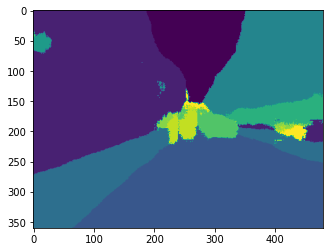

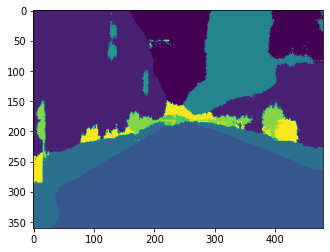

Epoch 43/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1841 - accuracy: 0.9323 - val_loss: 0.3515 - val_accuracy: 0.8994
Epoch 44/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1808 - accuracy: 0.9334 - val_loss: 0.3458 - val_accuracy: 0.8985
Epoch 45/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1765 - accuracy: 0.9351 - val_loss: 0.3477 - val_accuracy: 0.9011
Epoch 46/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1806 - accuracy: 0.9335 - val_loss: 0.3503 - val_accuracy: 0.8978
Epoch 47/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1846 - accuracy: 0.9313 - val_loss: 0.3562 - val_accuracy: 0.9007
Epoch 48/100
123/123 [==============================] - 34s 277ms/step - loss: 0.1758 - accuracy: 0.9352 - val_loss: 0.3582 - val_accuracy: 0.8996
Epoch 49/100
123/123 [==============================] - 34s 277ms/step - loss: 0.1744 - accuracy: 0.9354 - val_loss: 0

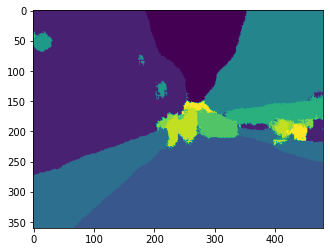

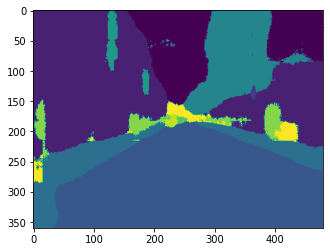

Epoch 53/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1663 - accuracy: 0.9382 - val_loss: 0.3542 - val_accuracy: 0.9010
Epoch 54/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1711 - accuracy: 0.9363 - val_loss: 0.3586 - val_accuracy: 0.9010
Epoch 55/100
123/123 [==============================] - 34s 277ms/step - loss: 0.1625 - accuracy: 0.9397 - val_loss: 0.3612 - val_accuracy: 0.9013
Epoch 56/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1699 - accuracy: 0.9367 - val_loss: 0.3628 - val_accuracy: 0.9001
Epoch 57/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1699 - accuracy: 0.9367 - val_loss: 0.3695 - val_accuracy: 0.8989
Epoch 58/100
123/123 [==============================] - 34s 277ms/step - loss: 0.1580 - accuracy: 0.9409 - val_loss: 0.3582 - val_accuracy: 0.8999
Epoch 59/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1642 - accuracy: 0.9386 - val_loss: 0

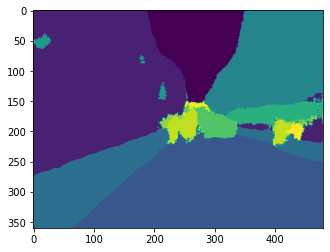

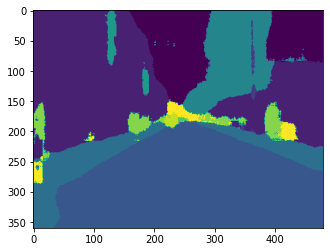

Epoch 63/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1622 - accuracy: 0.9394 - val_loss: 0.3709 - val_accuracy: 0.9001
Epoch 64/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1560 - accuracy: 0.9416 - val_loss: 0.3577 - val_accuracy: 0.9016
Epoch 65/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1667 - accuracy: 0.9377 - val_loss: 0.3636 - val_accuracy: 0.9006
Epoch 66/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1575 - accuracy: 0.9412 - val_loss: 0.3755 - val_accuracy: 0.8992
Epoch 67/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1541 - accuracy: 0.9423 - val_loss: 0.3567 - val_accuracy: 0.9017
Epoch 68/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1579 - accuracy: 0.9407 - val_loss: 0.3634 - val_accuracy: 0.9011
Epoch 69/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1594 - accuracy: 0.9400 - val_loss: 0

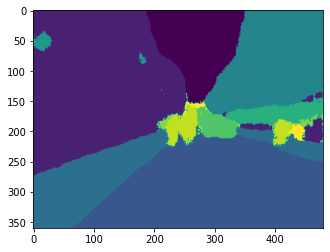

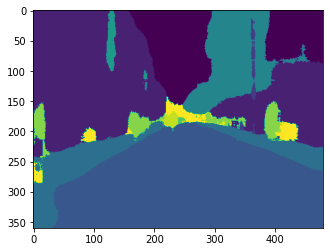

Epoch 73/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1550 - accuracy: 0.9418 - val_loss: 0.3635 - val_accuracy: 0.9017
Epoch 74/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1499 - accuracy: 0.9436 - val_loss: 0.3748 - val_accuracy: 0.8998
Epoch 75/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1544 - accuracy: 0.9419 - val_loss: 0.3672 - val_accuracy: 0.9004
Epoch 76/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1563 - accuracy: 0.9409 - val_loss: 0.3783 - val_accuracy: 0.9007
Epoch 77/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1520 - accuracy: 0.9429 - val_loss: 0.3792 - val_accuracy: 0.9004
Epoch 78/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1536 - accuracy: 0.9421 - val_loss: 0.3829 - val_accuracy: 0.8990
Epoch 79/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1471 - accuracy: 0.9446 - val_loss: 0

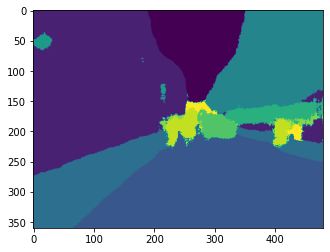

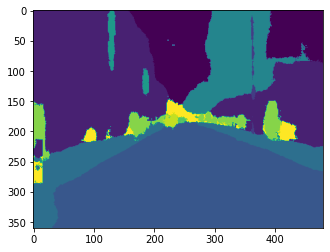

Epoch 83/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1497 - accuracy: 0.9437 - val_loss: 0.3874 - val_accuracy: 0.8988
Epoch 84/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1515 - accuracy: 0.9425 - val_loss: 0.3862 - val_accuracy: 0.8974
Epoch 85/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1406 - accuracy: 0.9469 - val_loss: 0.3946 - val_accuracy: 0.8989
Epoch 86/100
123/123 [==============================] - 34s 277ms/step - loss: 0.1466 - accuracy: 0.9447 - val_loss: 0.3861 - val_accuracy: 0.8993
Epoch 87/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1427 - accuracy: 0.9460 - val_loss: 0.3946 - val_accuracy: 0.9006
Epoch 88/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1421 - accuracy: 0.9463 - val_loss: 0.3871 - val_accuracy: 0.9004
Epoch 89/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1450 - accuracy: 0.9452 - val_loss: 0

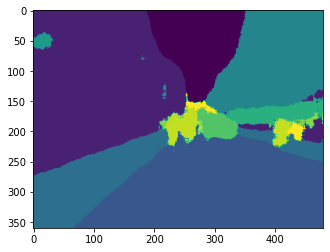

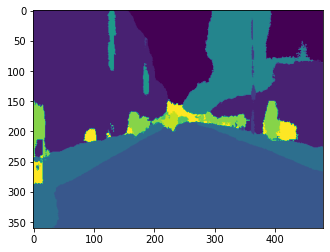

Epoch 93/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1439 - accuracy: 0.9455 - val_loss: 0.3965 - val_accuracy: 0.9001
Epoch 94/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1412 - accuracy: 0.9467 - val_loss: 0.3990 - val_accuracy: 0.8991
Epoch 95/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1385 - accuracy: 0.9476 - val_loss: 0.3916 - val_accuracy: 0.9005
Epoch 96/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1446 - accuracy: 0.9449 - val_loss: 0.3936 - val_accuracy: 0.8998
Epoch 97/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1400 - accuracy: 0.9470 - val_loss: 0.3979 - val_accuracy: 0.8995
Epoch 98/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1398 - accuracy: 0.9470 - val_loss: 0.4005 - val_accuracy: 0.8997
Epoch 99/100
123/123 [==============================] - 34s 276ms/step - loss: 0.1373 - accuracy: 0.9479 - val_loss: 0

In [ ]:
# Use fit or fit_generator
model.fit(train_x, train_y, epochs=total_epochs, batch_size=batch_size, validation_data=(test_x, test_y), callbacks=[PrintingCallback(), lrsched])  

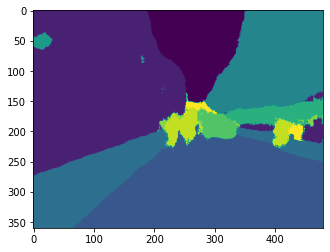

In [ ]:
import matplotlib.pyplot as plt
pred = model.predict(np.expand_dims(test_x[0], axis=0))[0].argmax(axis=2)
plt.imshow(pred)

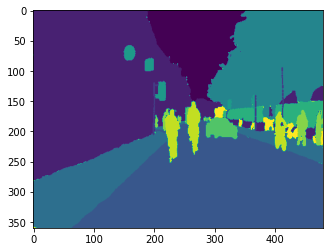

In [ ]:
plt.imshow(test_y[0].argmax(axis=2))

In [ ]:
score, acc = model.evaluate(test_x, test_y)
print('Test accuracy:', acc)

4/4 [==============================] - 2s 355ms/step - loss: 0.4039 - accuracy: 0.8998
Test accuracy: 0.8997784852981567


~90% acc